**System of 'uud'**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import iDEA

# run variables

points = 100
num_of_states = 1

# initalise the system

l = 1
x = np.linspace(0, l, points)
v_ext = np.zeros(len(x))
v_int = np.zeros([len(x), len(x)])
pib_single = iDEA.system.System(x, v_ext, v_int, electrons = "u")
pib_triple = iDEA.system.System(x, v_ext, v_int, electrons = "uud")

In [4]:
# initalise the arrays

energies_int = []
energies_single = []
energies_errors = []
occupied_levels = {}
occupied_info = {}

# solve for the state and extract the energy
for i in range(num_of_states):
    orbital_energy = []
    # methods using pib_single
    s = iDEA.methods.interacting.solve(pib_single, k=i)
    energies_single.append(np.round((s.energy / (np.pi)**2), decimals=4))

    # methods using pib_triple
    j = iDEA.methods.interacting.solve(pib_triple, k=i)
    energies_int.append(np.round((j.energy / (np.pi)**2), decimals=4))
    
    t = iDEA.methods.non_interacting.solve(pib_triple, k=i)
    energies_up = np.round((t.up.energies / ((np.pi)**2)), decimals=4) # energies of single body state
    energies_down = np.round((t.down.energies / ((np.pi)**2)), decimals=4)
    up_occ_index = t.up.occupied # index of occupied orbitals
    down_occ_index = t.down.occupied
    # up_occ = t.up.occupations # full array of occupations
    # down_occ = t.down.occupations

    for index in up_occ_index:
        orbital_energy.append(energies_up[index])

    for index in down_occ_index:
        orbital_energy.append(energies_down[index])

    energy_sum = np.sum(orbital_energy)
    
    occupied_levels[f"State = {i}"] = (f"Orbitals occupied by up: {up_occ_index}", f"Orbitals occupied by down: {down_occ_index}", \
                                       f"Energy of occupied orbitals: {orbital_energy}", f"Total energy = {energy_sum}")
    occupied_info[i] = [up_occ_index, down_occ_index, orbital_energy, energy_sum]
    
    
    energies_errors.append(abs( (((i+1)**2)/2) - np.round((s.energy / (np.pi)**2), decimals=4)))
    print(f"State {i} done")
    # state = iDEA.methods.non_interacting.solve(pib, k=i)
    # e = iDEA.methods.non_inte(np.round((j.energy / (np.pi)**2), decimals=4))racting.total_energy(pib, state)
    # energies_non_int.append(e)
print("Done")


iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.non_interacting.solve: convergence = 1.532e-13, tolerance = 1e-10
State 0 done
Done


In [5]:
for key, value in occupied_levels.items():
    print(f'{key}: {value}')
    print('---') 

State = 0: ('Orbitals occupied by up: [0 1]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.4825, 1.9299, 0.4825]', 'Total energy = 2.8949')
---


In [6]:
# print results

print("Energies of interacting method 'uu'")
for i, value in enumerate(energies_int):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Energies of interacting method 'u'")
for i, value in enumerate(energies_single):
    print(f"State = {i}, energy = {value} per pi squared")
print("")
print("Errors")
for i, value in enumerate(energies_errors):
    print(f"State = {i}, error = {value} per pi squared")
    

Energies of interacting method 'uu'
State = 0, energy = 2.8948 per pi squared

Energies of interacting method 'u'
State = 0, energy = 0.4825 per pi squared

Errors
State = 0, error = 0.017500000000000016 per pi squared


In [7]:
# print the degenerate states

for i in range(len(energies_int)):
    if energies_int[i] == energies_int[i-1]:
        print(f"State {i-1} and {i} have the same energy")

State -1 and 0 have the same energy


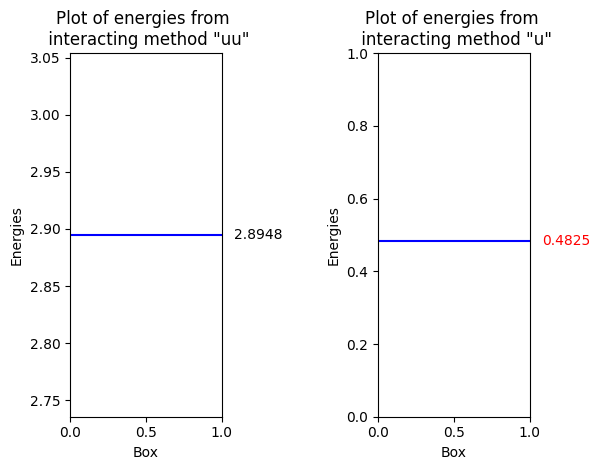

In [8]:
# plot the energies

fig, (ax1, ax2) = plt.subplots(1, 2)

for i, value in enumerate(energies_int):
    ax1.axhline(y=value, color='b', linestyle='-')
    if energies_int[i] == energies_int[i-1]:
        ax1.text(x=1.4, y=value, s=f'{value}', color='black', va='center', ha='right')
    else:
        ax1.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')

for i, value in enumerate(energies_single):
    ax2.axhline(y=value, color='b', linestyle='-')
    ax2.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')


ax1.set_title('Plot of energies from \n interacting method "uu"')
ax2.set_title('Plot of energies from \n interacting method "u"')
ax1.set_xlabel("Box")
ax1.set_ylabel("Energies")
ax2.set_xlabel("Box")
ax2.set_ylabel("Energies")
plt.tight_layout()
plt.show()

In [9]:

# occupied-info[state][0: up_occ_index, 1: down_occ_index, 2: orbital_energy, 3: energy_sum]

# Function to update the plot
def update_plot(k):
    plt.figure(figsize=(3, 4))
    plt.clf()

    # Plot horizontal lines and text for each value in energies_single
    for i, value in enumerate(energies_single):
        plt.axhline(y=value, color='b', linestyle='-')
        plt.text(x=1.3, y=value, s=f'{value}', color='red', va='center', ha='right')
    
    if occupied_info[k][2][0] == occupied_info[k][2][1]:
        plt.plot(0.25, occupied_info[k][2][0], "ro")
        plt.plot(0.75, occupied_info[k][2][1], "ro")
    else:
        plt.plot(0.5, occupied_info[k][2][0], "ro")
        plt.plot(0.5, occupied_info[k][2][1], "ro")

    plt.xlim(0, 1)
    plt.ylim(min(energies_single) - 1, max(energies_single) + 1)
    plt.title("k-state occupation, up=red, down=green")
    
    plt.show()

# Create a slider widget
k_slider = widgets.IntSlider(value=5, min=0, max=len(occupied_info) - 1, step=1, description='k:')

# Update the plot when the slider value changes
widgets.interact(update_plot, k=k_slider)

# Display the slider
display(k_slider)


interactive(children=(IntSlider(value=0, description='k:', max=0), Output()), _dom_classes=('widget-interact',…

IntSlider(value=0, description='k:', max=0)